

#  Investigate  No-show appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
 
> ● ‘ScheduledDay’ tells us on what day the patient set up their appointment.                         
> ● ‘Neighborhood’ indicates the location of the hospital.                                           
> ● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian
     welfare program Bolsa Família.                                                                   
> ● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their 
    appointment, and ‘Yes’ if they did not show up


### Question(s) for Analysis

>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#   types and look for instances of missing or possibly errant data.
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [3]:
# exploring the data shape
df.shape

(110527, 14)

This dataset contain 110527 rows and 14 columns

In [4]:
# exploring if there any missing values or any wrong data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no missing data in this dataset and all data type are good 

In [5]:
# exploring the duplicatin data 
df.duplicated().sum()

0

There is no identical rows in this dataset

In [6]:
# exploring the number of unique Patients 
df.PatientId.nunique()

62299

there  is only 62299 unique Patient out of 110527 appointments

In [7]:
# exploring some information about the data
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

We can notice that the mean age is 37 ,the max age is 115 and the min age is -1 whiche is impossible and we have to fix it.
We can notice also that most of the patients didn't have chronic diseases or have scholarship


### Data Cleaning


In [8]:
# Fixing the min age -1 
wrong_age = df.query('Age == -1')
wrong_age

PatientId  AppointmentID Gender          ScheduledDay  \
99832  4.659432e+14        5775010      F  2016-06-06T08:58:13Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
99832  2016-06-06T00:00:00Z   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832         0           0        0             0      No

In [9]:
# Deleting wrong age raw from our dataset
df.drop(index = 99832 ,inplace =True)
# Make sure that the wrong raw deleted
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105260e+05   1.105260e+05  110526.000000  110526.000000   
mean   1.474934e+14   5.675304e+06      37.089219       0.098266   
std    2.560943e+14   7.129544e+04      23.110026       0.297676   
min    3.921784e+04   5.030230e+06       0.000000       0.000000   
25%    4.172536e+12   5.640285e+06      18.000000       0.000000   
50%    3.173184e+13   5.680572e+06      37.000000       0.000000   
75%    9.438963e+13   5.725523e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110526.000000  110526.000000  110526.000000  110526.000000   
mean        0.197248       0.071865       0.030400       0.022248   
std         0.397923       0.258266       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110526.000000  
mean        0.321029  
std         0.466874  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [10]:
# Droping some columns we will not use in our analysis 
df.drop(['PatientId' ,'AppointmentID' , 'ScheduledDay' , 'AppointmentDay'] , axis = 1 , inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
Gender           110526 non-null object
Age              110526 non-null int64
Neighbourhood    110526 non-null object
Scholarship      110526 non-null int64
Hipertension     110526 non-null int64
Diabetes         110526 non-null int64
Alcoholism       110526 non-null int64
Handcap          110526 non-null int64
SMS_received     110526 non-null int64
No-show          110526 non-null object
dtypes: int64(7), object(3)
memory usage: 9.3+ MB


In [11]:
# Renaming  columns 
# Corecting the Hipertension label to Hypertension
df.rename(columns = {'Hipertension' : 'Hypertension'} , inplace = True)

# Changing the No-show label to No_show
df.rename(columns = {'No-show' : 'No_show'} , inplace = True)
df.head(2)

Gender  Age    Neighbourhood  Scholarship  Hypertension  Diabetes  \
0      F   62  JARDIM DA PENHA            0             1         0   
1      M   56  JARDIM DA PENHA            0             0         0   

   Alcoholism  Handcap  SMS_received No_show  
0           0        0             0      No  
1           0        0             0      No

<a id='eda'></a>
## Exploratory Data Analysis



### General look on the dataset

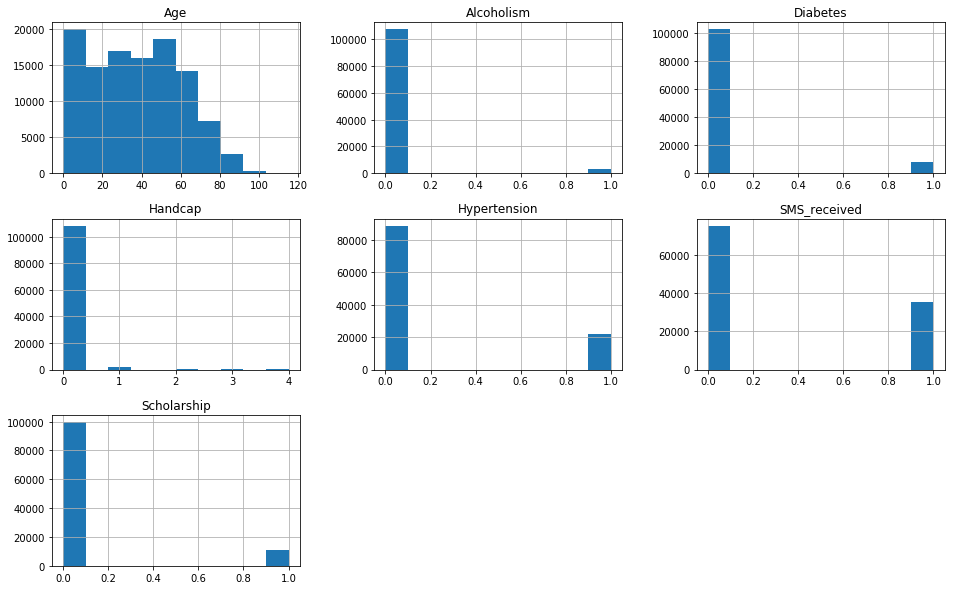

In [12]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize = (16,10));

* Most of the patients don't have chronic diseases or handicapped
* Around halfe of the patients recived SMS
* Around 10% of the patients have scholarsipe 


In [13]:
# Create two dataframes to know who attended the appointment and who didn't 
df_show = df.No_show == 'No'
df_no_show = df.No_show == 'Yes'

In [14]:
df[df_show].count()

Gender           88207
Age              88207
Neighbourhood    88207
Scholarship      88207
Hypertension     88207
Diabetes         88207
Alcoholism       88207
Handcap          88207
SMS_received     88207
No_show          88207
dtype: int64

In [15]:
df[df_no_show].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
No_show          22319
dtype: int64

The number of those who attended is about four times those who didn't attend

In [16]:
""""Creating Function to drwo plot answer the Question
    input 
     column_name : the variable who may effect on the attendance"""
     
def Patients_attendance (col_name):
    plt.figure(figsize=(12,4))
    df[col_name][df_show].hist(alpha = .5 , label = 'Show')
    df[col_name][df_no_show].hist(alpha = .5 , label = ' No Show')
    plt.legend()
    plt.title( col_name + ' effect on  patients attendance ')
    plt.xlabel(col_name)
    plt.ylabel('patients Number')
    


### Research Question 1  (Does age effect on patients attendance ?)

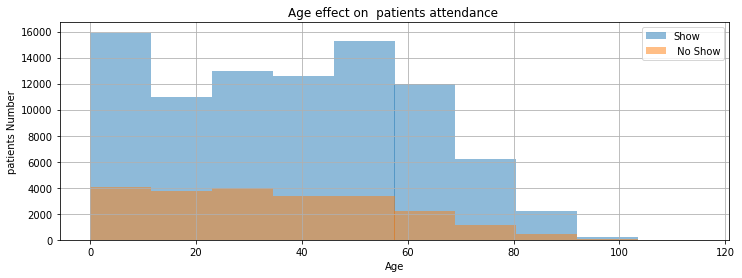

In [17]:
Patients_attendance('Age')

#### We can say that the most attending group is the new born and the kids till 8 years
#### after that came the group between 45 years and 58 years 

### Research Question 2 (Does gendar effect on patients attendance ?)

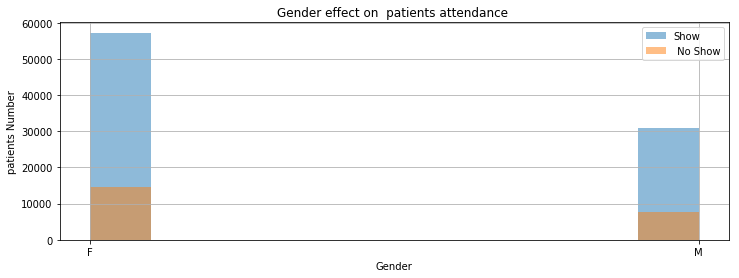

In [18]:
Patients_attendance('Gender')

#### Gender has no clear effect on patients attendance

### Research Question 3 (Does Scholarship effect on patients attendance ?)

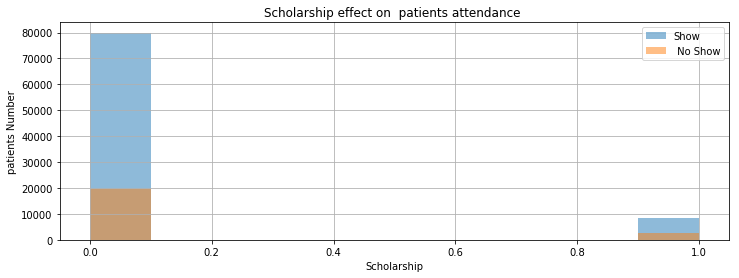

In [19]:
Patients_attendance('Scholarship')

#### Scholarship has no clear effect on patients attendance

### Research Question 4 (Does SMS_received effect on patients attendance ?)

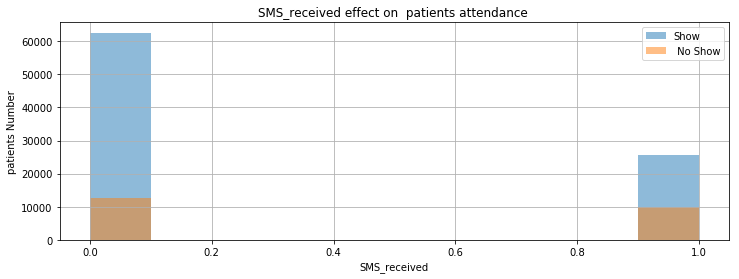

In [20]:
Patients_attendance('SMS_received')

#### There is unusual  effect here the patients who didn't received SMS attend more

### Research Question 5 (Does Neighbourhood effect on patients attendance ?)

Text(0,0.5,'patients Number')

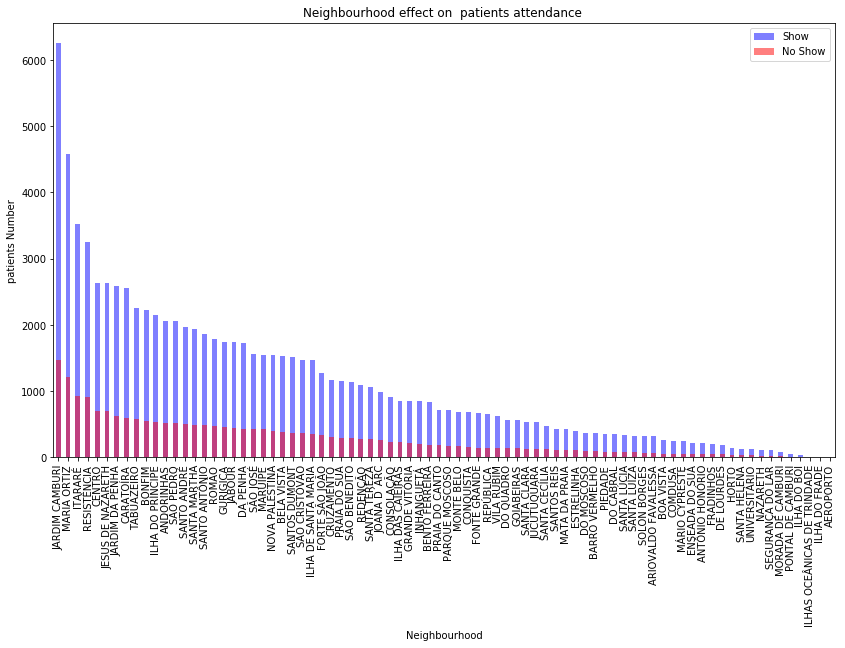

In [21]:
#Does Neighbourhood effect on patients attendance
plt.figure(figsize=(14,8))
df.Neighbourhood[df_show].value_counts().plot(kind = 'bar' , color = 'blue' , alpha = .5 , label = 'Show')
df.Neighbourhood[df_no_show].value_counts().plot(kind = 'bar' , color = 'red' , alpha = .5 , label = 'No Show')
plt.legend()
plt.title( 'Neighbourhood effect on  patients attendance ')
plt.xlabel('Neighbourhood')
plt.ylabel('patients Number')

#### The Neighbourhood has strong effect on patients attendance

### Research Question 6 (Does chronic diseases effect on patients attendance ?)

Text(0,0.5,'mean age')

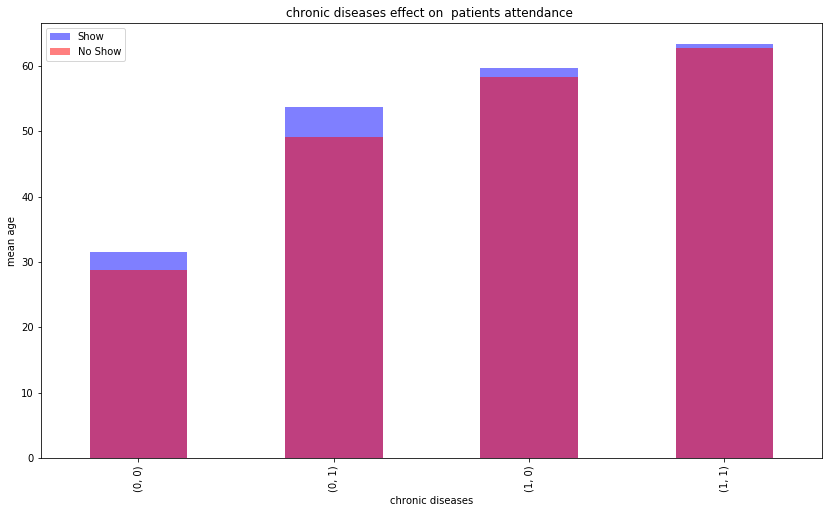

In [22]:
#Does chronic diseases effect on patients attendance
plt.figure(figsize=(14,8))
df[df_show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind = 'bar' , color = 'blue' , alpha = .5 , label = 'Show')
df[df_no_show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind = 'bar' , color = 'red' , alpha = .5 , label = 'No Show')
plt.legend()
plt.title( 'chronic diseases effect on  patients attendance ')
plt.xlabel('chronic diseases')
plt.ylabel('mean age')

#### chronic diseases debend on patients age has no clear effect on patients attendance

<a id='conclusions'></a>
## Conclusions

#### * We can say that the most attending group is the new born and the kids till 8 years after that came the group between 45 years and 58 years 
#### * There is unusual effect here the patients who didn't received SMS attend more
#### * The Neighbourhood has strong effect on patients attendance


## limitation
#### Couldn't find any clear correlation between age , gender , Scholarship and chronic diseases on patients attendance



## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0